# Análise de Dados sobre Sífilis Congênita em Gestantes  
**Grupo:** Diego Escorel, Gabriel Cavalcanti, Júlia Boto, Lucas Emery, Mirna Lustosa e Renato Santana

Este projeto apresenta uma análise exploratória e preditiva de um conjunto de dados sobre gestantes, com foco em fatores associados à sífilis congênita. A análise inclui visualizações, modelagem preditiva e agrupamento de perfis, utilizando técnicas de aprendizado de máquina supervisionado e não supervisionado.

In [14]:
# Instalação de bibliotecas
!pip install seaborn --quiet

# Imports principais
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

# Configurações de exibição
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('Set2')
pd.set_option('display.max_columns', None)

In [15]:
from google.colab import files

# Fazer upload dos arquivos "data_set.csv" e "attributes.csv"
uploaded = files.upload()

Saving data_set.csv to data_set (2).csv
Saving attributes.csv to attributes (2).csv


## Carregamento dos Dados
Nesta etapa, carregamos os dados e visualizamos as primeiras linhas do conjunto.

In [16]:
dados = pd.read_csv('data_set.csv')
atributos = pd.read_csv('attributes.csv')

print("Visualização inicial dos dados:")
dados.head()

Visualização inicial dos dados:


,VDRL_RESULT,CONS_ALCOHOL,RH_FACTOR,SMOKER,PLAN_PREGNANCY,BLOOD_GROUP,HAS_PREG_RISK,TET_VACCINE,IS_HEAD_FAMILY,MARITAL_STATUS,FOOD_INSECURITY,NUM_ABORTIONS,NUM_LIV_CHILDREN,NUM_PREGNANCIES,FAM_PLANNING,TYPE_HOUSE,HAS_FAM_INCOME,LEVEL_SCHOOLING,CONN_SEWER_NET,NUM_RES_HOUSEHOLD,HAS_FRU_TREE,HAS_VEG_GARDEN,FAM_INCOME,HOUSING_STATUS,WATER_TREATMENT,AGE
0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,3.0,4.0,4.0,0.0,4.0,0.0,5.0,0.0,2.0,1.0,1.0,0.0,1.0,2.0,25.0
1,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,5.0,0.0,3.0,4.0,1.0,1.0,4.0,0.0,5.0,0.0,2.0,1.0,1.0,2.0,1.0,3.0,25.0
2,1.0,1.0,2.0,1.0,1.0,4.0,1.0,0.0,1.0,5.0,2.0,0.0,0.0,1.0,0.0,4.0,1.0,6.0,2.0,4.0,1.0,1.0,3.0,0.0,3.0,24.0
3,1.0,1.0,2.0,1.0,0.0,4.0,0.0,0.0,1.0,5.0,2.0,3.0,2.0,3.0,0.0,4.0,0.0,2.0,1.0,3.0,1.0,1.0,0.0,0.0,2.0,28.0
4,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,3.0,1.0,1.0,0.0,4.0,1.0,4.0,1.0,3.0,1.0,1.0,0.0,0.0,3.0,27.0


## Estatísticas Descritivas
Analisamos as estatísticas básicas de cada variável e verificamos se há dados ausentes.

In [17]:
# Estatísticas básicas
dados.describe().T

# Verificar valores ausentes
print("\nValores ausentes por coluna:")
print(dados.isnull().sum())


Valores ausentes por coluna:
VDRL_RESULT          0
CONS_ALCOHOL         0
RH_FACTOR            0
SMOKER               0
PLAN_PREGNANCY       0
BLOOD_GROUP          0
HAS_PREG_RISK        0
TET_VACCINE          0
IS_HEAD_FAMILY       0
MARITAL_STATUS       0
FOOD_INSECURITY      0
NUM_ABORTIONS        0
NUM_LIV_CHILDREN     0
NUM_PREGNANCIES      0
FAM_PLANNING         0
TYPE_HOUSE           0
HAS_FAM_INCOME       0
LEVEL_SCHOOLING      0
CONN_SEWER_NET       0
NUM_RES_HOUSEHOLD    0
HAS_FRU_TREE         0
HAS_VEG_GARDEN       0
FAM_INCOME           0
HOUSING_STATUS       0
WATER_TREATMENT      0
AGE                  0
dtype: int64


## Análise da Idade e Correlações entre Variáveis
Visualizamos a distribuição da idade das gestantes e a matriz de correlação entre variáveis numéricas.

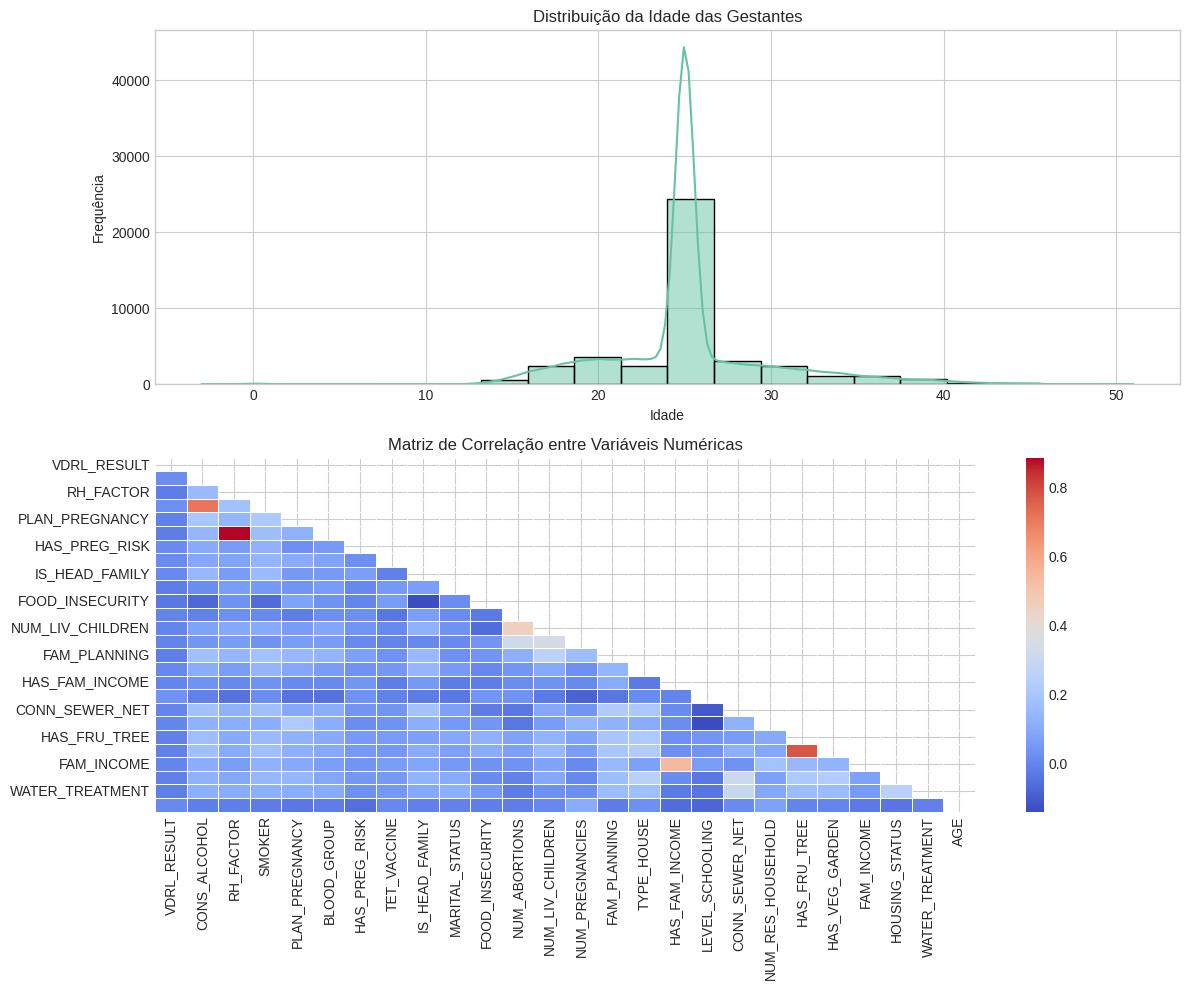

In [18]:
plt.figure(figsize=(12, 10))

# Histograma da idade
plt.subplot(2, 1, 1)
sns.histplot(dados['AGE'], kde=True, bins=20)
plt.title('Distribuição da Idade das Gestantes')
plt.xlabel('Idade')
plt.ylabel('Frequência')

# Matriz de correlação
plt.subplot(2, 1, 2)
correlacao = dados.corr(numeric_only=True)
mascara = np.triu(np.ones_like(correlacao, dtype=bool))
sns.heatmap(correlacao, mask=mascara, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de Correlação entre Variáveis Numéricas')

plt.tight_layout()
plt.show()

## Análise de Variáveis Categóricas
Nesta seção, observamos a distribuição de variáveis socioeconômicas relevantes.

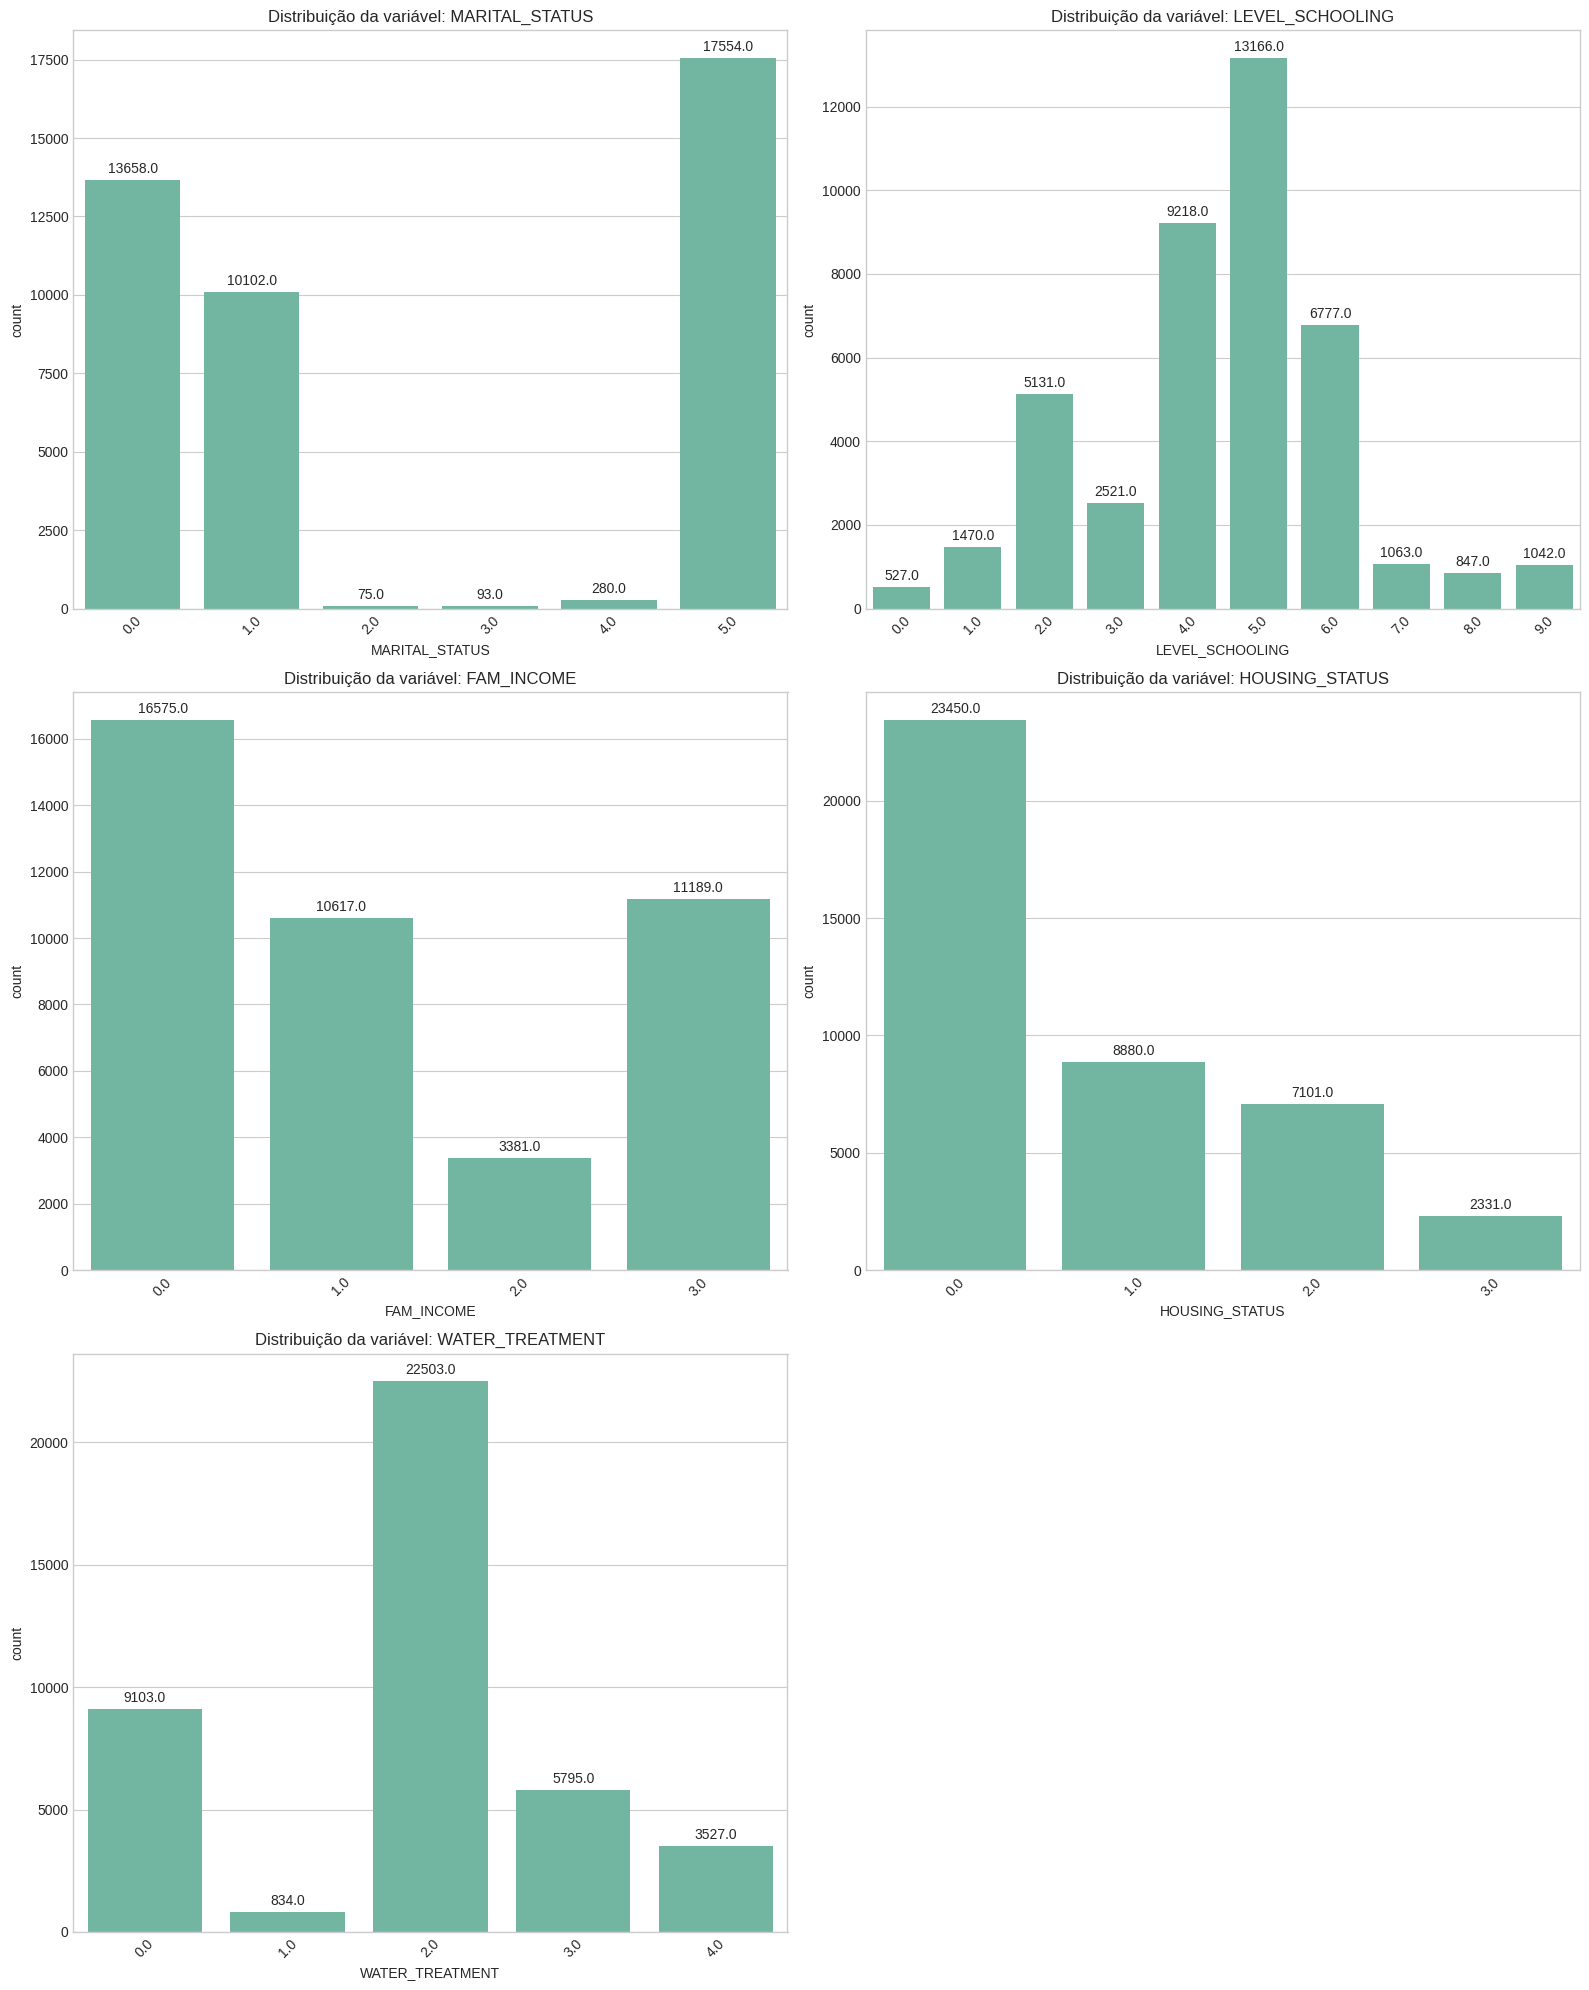

In [19]:
colunas = ['MARITAL_STATUS', 'LEVEL_SCHOOLING', 'FAM_INCOME', 'HOUSING_STATUS', 'WATER_TREATMENT']

plt.figure(figsize=(16, 20))

for i, coluna in enumerate(colunas):
    plt.subplot(3, 2, i+1)
    grafico = sns.countplot(data=dados, x=coluna)
    plt.title(f'Distribuição da variável: {coluna}')
    plt.xticks(rotation=45)
    for p in grafico.patches:
        grafico.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                         ha='center', va='baseline', xytext=(0, 5), textcoords='offset points')

plt.tight_layout()
plt.show()

## Modelos de Classificação: KNN e Árvore de Decisão
Aplicamos modelos preditivos para prever o resultado do exame VDRL, indicador de sífilis congênita.

In [21]:
# Preparo dos dados
X = dados.drop('VDRL_RESULT', axis=1)
y = dados['VDRL_RESULT']

X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.3, random_state=42)

# KNN
modelo_knn = KNeighborsClassifier(n_neighbors=5)
modelo_knn.fit(X_treino, y_treino)
previsao_knn = modelo_knn.predict(X_teste)

print("Acurácia do KNN:", accuracy_score(y_teste, previsao_knn))
print("\nMatriz de Confusão (KNN):")
print(confusion_matrix(y_teste, previsao_knn))
print("\nRelatório de Classificação (KNN):")
print(classification_report(y_teste, previsao_knn))

# Árvore de Decisão
modelo_arvore = DecisionTreeClassifier(max_depth=5, random_state=42)
modelo_arvore.fit(X_treino, y_treino)
previsao_arvore = modelo_arvore.predict(X_teste)

print("\nAcurácia da Árvore de Decisão:", accuracy_score(y_teste, previsao_arvore))
print("\nMatriz de Confusão (Árvore):")
print(confusion_matrix(y_teste, previsao_arvore))
print("\nRelatório de Classificação (Árvore):")
print(classification_report(y_teste, previsao_arvore))


Acurácia do KNN: 0.9812435150450953

Matriz de Confusão (KNN):
[[    0   234]
 [    1 12294]]

Relatório de Classificação (KNN):
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       234
         1.0       0.98      1.00      0.99     12295

    accuracy                           0.98     12529
   macro avg       0.49      0.50      0.50     12529
weighted avg       0.96      0.98      0.97     12529


Acurácia da Árvore de Decisão: 0.9810838853859047

Matriz de Confusão (Árvore):
[[    0   234]
 [    3 12292]]

Relatório de Classificação (Árvore):
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       234
         1.0       0.98      1.00      0.99     12295

    accuracy                           0.98     12529
   macro avg       0.49      0.50      0.50     12529
weighted avg       0.96      0.98      0.97     12529



## Visualização da Árvore e Importância das Variáveis
Mostramos a árvore de decisão e as variáveis mais relevantes para a predição.

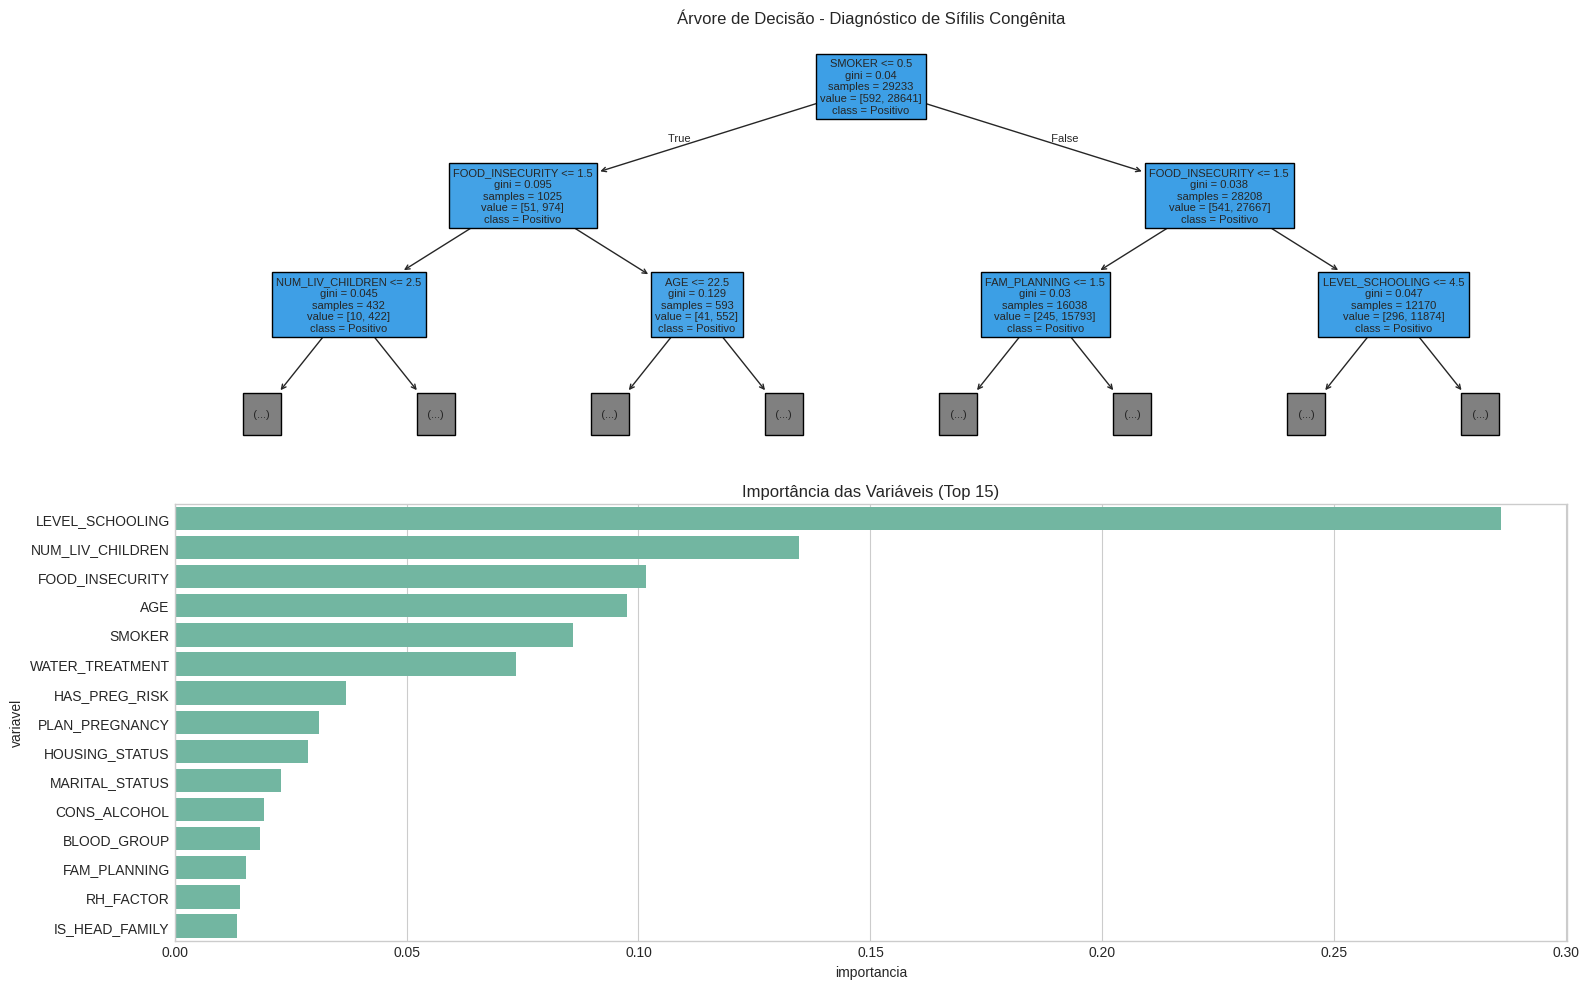

In [23]:
plt.figure(figsize=(16, 10))

plt.subplot(2, 1, 1)
plot_tree(modelo_arvore, feature_names=X.columns, class_names=['Negativo', 'Positivo'], filled=True, max_depth=2)
plt.title('Árvore de Decisão - Diagnóstico de Sífilis Congênita')

importancia = pd.DataFrame({
    'variavel': X.columns,
    'importancia': modelo_arvore.feature_importances_
}).sort_values(by='importancia', ascending=False).head(15)

plt.subplot(2, 1, 2)
sns.barplot(x='importancia', y='variavel', data=importancia)
plt.title('Importância das Variáveis (Top 15)')

plt.tight_layout()
plt.show()

## Clusterização com K-means
Agrupamos gestantes com base em idade, gestações, filhos vivos e abortos.

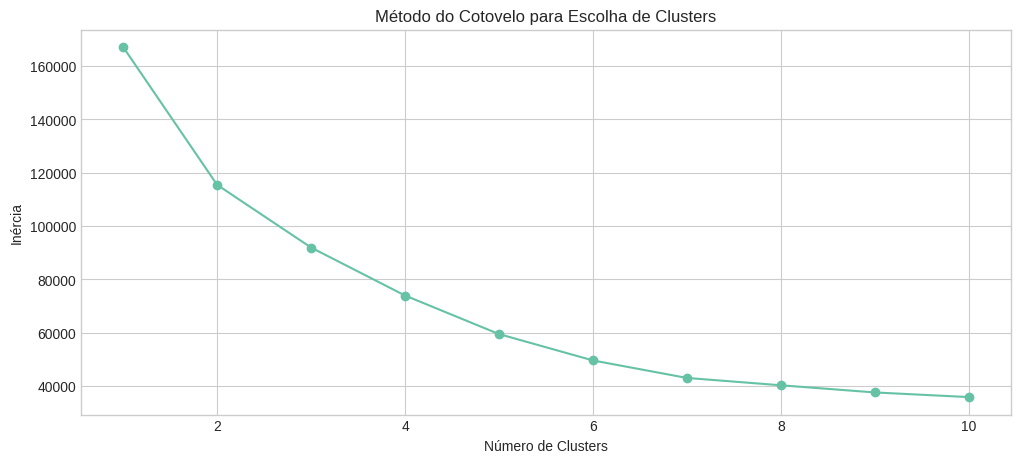

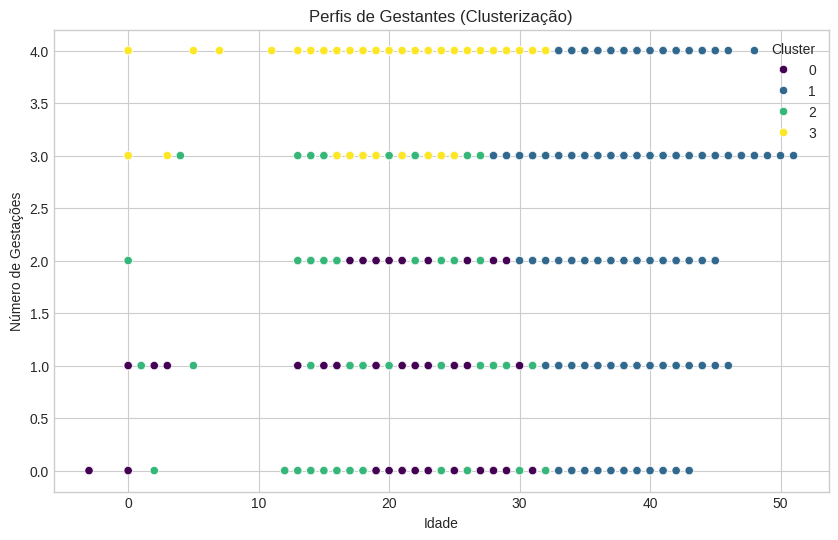

In [24]:
colunas_cluster = ['AGE', 'NUM_PREGNANCIES', 'NUM_LIV_CHILDREN', 'NUM_ABORTIONS']
dados_cluster = dados[colunas_cluster].copy()

escalador = StandardScaler()
dados_normalizados = escalador.fit_transform(dados_cluster)

inercia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(dados_normalizados)
    inercia.append(kmeans.inertia_)

plt.figure(figsize=(12, 5))
plt.plot(range(1, 11), inercia, marker='o')
plt.title('Método do Cotovelo para Escolha de Clusters')
plt.xlabel('Número de Clusters')
plt.ylabel('Inércia')
plt.grid(True)
plt.show()

kmeans = KMeans(n_clusters=4, random_state=42)
dados_cluster['Cluster'] = kmeans.fit_predict(dados_normalizados)

plt.figure(figsize=(10, 6))
sns.scatterplot(x='AGE', y='NUM_PREGNANCIES', hue='Cluster', data=dados_cluster, palette='viridis')
plt.title('Perfis de Gestantes (Clusterização)')
plt.xlabel('Idade')
plt.ylabel('Número de Gestações')
plt.show()